origin: http://pytorch.org/tutorials/beginner/pytorch_with_examples.html  
translator: Hongpu Liu

In [1]:
%matplotlib inline
from __future__ import print_function

# 用PyTorch中的Optim进行权重更新
在前面的例子中通过手工的方式更新模型权重，模型的权重存储于变量的**.data**之中。这对于像随机梯度下降这样的算法来说并不困难，但是在实践中，我们经常会使用诸如**AdaGrad**、**RMSProp**、**Adam**等，更成熟的优化器。

PyTorch的**optim**包对优化算法进行抽象，并提供了常用优化算法的实现。

下面的例子将使用**nn**包来定义模型，并使用**optim**包提供的**Adam**算法进行模型优化。

In [5]:
import torch
from torch.autograd import Variable

# N     ：样本的数量，本例采用批量梯度下降，每次训练使用全部的样本
# D_in  ：输入特征的维度
# H     ：隐层神经元的数量
# D_out ：输出层维度
N, D_in, H, D_out = 64, 1000, 100, 10

# 创建存储输入和输出的张量，并将他们封装到变量中
x = Variable(torch.randn(N, D_in)) # 默认情况下，requires_grad为False
y = Variable(torch.randn(N, D_out), requires_grad=False)

# 用nn包将我们的模型定义为一连串的层。
# nn.Sequential是一个包含其他模块的模块，将其包含的模块按顺序排列以计算输出。
# 每个Linear模块用一个线性函数计算对应的输出，并保持存储weight与bias的内部变量。
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# nn包还包含了很多流行的损失函数，在这个例子中使用MSE作为损失函数
loss_fn = torch.nn.MSELoss(size_average=False)

# 设置学习率
learning_rate = 1e-4

# 使用optim包来定义一个用来更新模型权重的优化器。本例中将使用Adam。
# optim包中包含很多其他的优化算法。
# Adam构造器的第一个参数，用来告知优化器哪些变量需要更新。
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losses = []

for t in range(500):
    # 前馈：通过将x传递给模型来计算y的预测值。Module对象重写了__call__方法，
    # 因此可以像函数一样调用它们。当调用model时，会根据输入的变量计算并返回
    # 输出变量。
    y_pred = model(x)
    
    # 计算并打印loss。将包含y的预测和真值的变量传递给损失函数，损失函数将返回
    # 一个包含loss的变量。
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])
    
    losses.append(loss.data[0])
    
    # 在反向传播之前，用优化器对象把所有需要更新的变量梯度清除。这是因为
    # 每次调用 .backward() 都会将计算的梯度累加到梯度缓存中（而不是替换）。
    # 阅读 torch.autograd.backward 以获得更多细节。
    optimizer.zero_grad()
    
    # 反向传播：计算损失函数关于模型所有可学习变量的梯度。
    loss.backward()
    
    # 用梯度下降算法更新权重。每个参数都是一个变量，可以访问其data和gradient。
    optimizer.step()

0 646.47479248
1 629.320556641
2 612.663757324
3 596.535095215
4 580.851806641
5 565.607666016
6 550.897277832
7 536.622436523
8 522.747192383
9 509.240142822
10 496.178283691
11 483.517425537
12 471.220123291
13 459.258880615
14 447.568725586
15 436.191589355
16 425.172302246
17 414.406616211
18 403.924255371
19 393.661437988
20 383.65447998
21 373.910858154
22 364.448974609
23 355.2472229
24 346.300415039
25 337.609588623
26 329.107116699
27 320.880615234
28 312.872070312
29 305.021148682
30 297.320007324
31 289.772338867
32 282.405944824
33 275.204162598
34 268.155517578
35 261.256134033
36 254.524047852
37 247.942550659
38 241.513641357
39 235.261444092
40 229.134796143
41 223.142990112
42 217.312164307
43 211.598571777
44 206.008789062
45 200.52911377
46 195.207702637
47 190.014419556
48 184.92074585
49 179.9559021
50 175.096282959
51 170.350448608
52 165.72605896
53 161.203903198
54 156.779525757
55 152.456665039
56 148.224990845
57 144.085403442
58 140.029891968
59 136.070373535

435 3.62563419287e-08
436 3.31062643966e-08
437 3.0119210237e-08
438 2.75607199285e-08
439 2.51142147079e-08
440 2.28609344788e-08
441 2.08753085928e-08
442 1.89828845976e-08
443 1.73377863177e-08
444 1.58342317036e-08
445 1.43329055291e-08
446 1.31155495353e-08
447 1.19502372442e-08
448 1.09213296184e-08
449 9.92039161929e-09
450 9.01818975052e-09
451 8.22785217736e-09
452 7.47011164037e-09
453 6.79420519845e-09
454 6.23758289464e-09
455 5.62243229751e-09
456 5.11704545403e-09
457 4.68515981566e-09
458 4.26120205788e-09
459 3.86344645165e-09
460 3.50764040036e-09
461 3.20831849976e-09
462 2.93526181139e-09
463 2.68541922033e-09
464 2.46641729262e-09
465 2.25746399352e-09
466 2.06001549152e-09
467 1.89050242128e-09
468 1.7326955426e-09
469 1.59313673365e-09
470 1.46138146029e-09
471 1.33864319629e-09
472 1.24016330538e-09
473 1.13916009958e-09
474 1.05134700945e-09
475 9.7060726123e-10
476 8.98382146453e-10
477 8.19270373764e-10
478 7.5143624656e-10
479 7.08054337384e-10
480 6.60207610

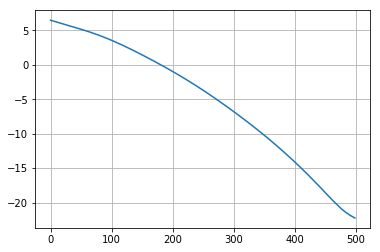

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.log(losses))
plt.grid()